In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
from Custom import Mouse
import Hearis as h 

import settings as s
import matplotlib.pyplot as plt
plt.style.use('default')
batch = s.Batch()

Processing files for mice 753564...
DISLB_10032022_753564_1.DAT
DISLB_11032022_753564_1.DAT
Processing files for mice 753572...
Processing files for mice 753573...
DISLB_03032022_753573_1.DAT
DISLB_08032022_753573_1.DAT
DISLB_04032022_753573_1.DAT
DISLB_09032022_753573_1.DAT
DISLB_07032022_753573_1.DAT
[48.35164835164835, 50.0]
[]
[63.800904977375566, 61.50442477876106, 77.08333333333333, 73.83177570093459, 67.5]


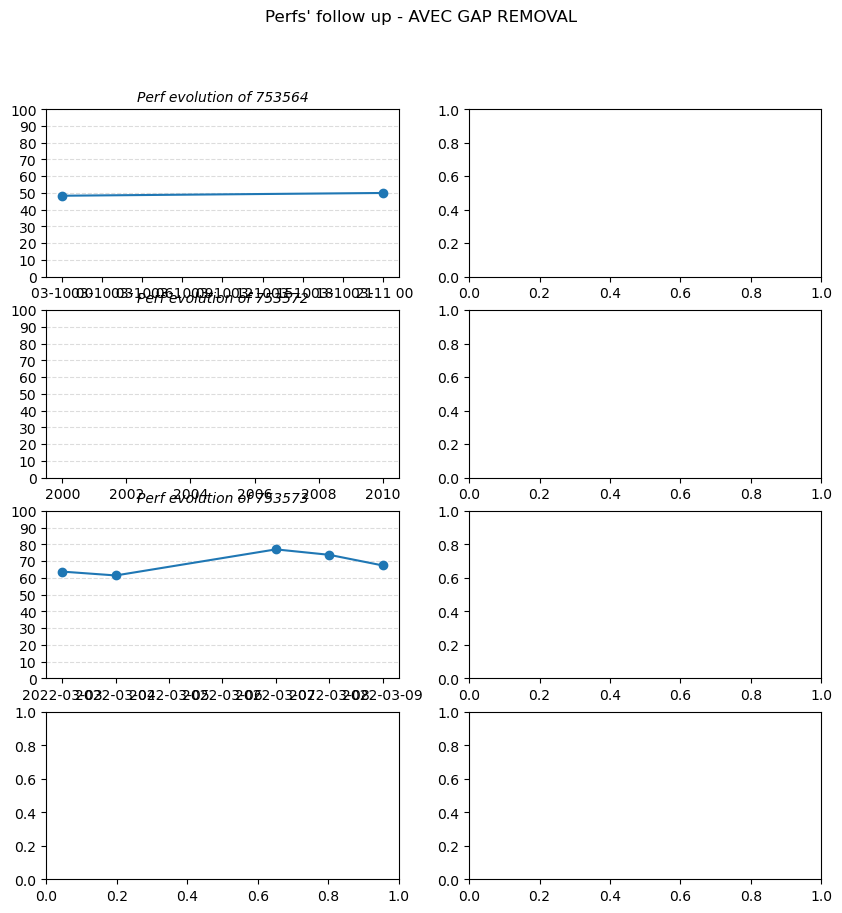

In [2]:
mice_id = batch.id_first_dlp
mice = [Mouse(path='/home/anverdie/share/gaia/Data/Optogenetic/DLP/{}'.format(i), tag=['DISLB'], blank=True, dlp=True, rmgaps='Antonin', linkday=True, verbose=True) for i in mice_id]
h.all_perfs(mice, blank=True)


In [4]:

sf = 150

fig, axs = plt.subplots(3, figsize=(12, 12))
for i, mouse in enumerate(mice):
    files = [np.array(f.tr_corr) for f in mouse.elphy]
    if len(files) != 0:
        corr = np.concatenate(files)
        conv_corr = np.convolve(corr, np.ones(sf)/sf, mode='valid')
        axs[i].plot(conv_corr)
    
    

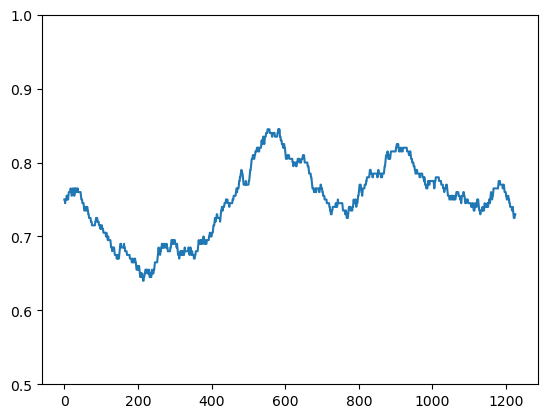

In [11]:
sf = 200
mouse = mice[2]
files = [np.array(f.tr_corr) for f in mouse.elphy]
if len(files) != 0:
    corr = np.concatenate(files)
    conv_corr = np.convolve(corr, np.ones(sf)/sf, mode='valid')
    plt.plot(conv_corr)
    plt.ylim((0.5, 1))
    plt.savefig('dlp_mouse_learned.svg')

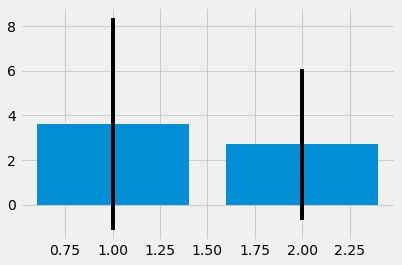

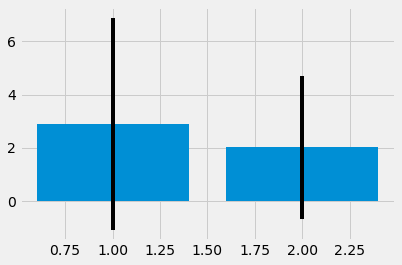

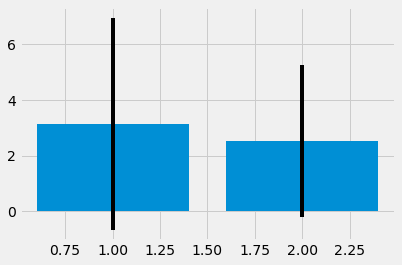

In [20]:
for mouse in mice:
    ta_type = np.concatenate([f.ta_type for f in mouse.elphy][:-2])
    tr_licks = np.concatenate([f.tr_licks for f in mouse.elphy][:-2])
    tr_task = np.concatenate([f.tr_type for f in mouse.elphy][:-2])
    
    go_licks = [l for t, l in zip(tr_task, tr_licks) if t == 2]
    nogo_licks = [l for t, l in zip(tr_task, tr_licks) if t == 3]
    
    plt.bar([1, 2], [np.mean(go_licks), np.mean(nogo_licks)], yerr=[np.std(go_licks), np.std(nogo_licks)])
    plt.show()

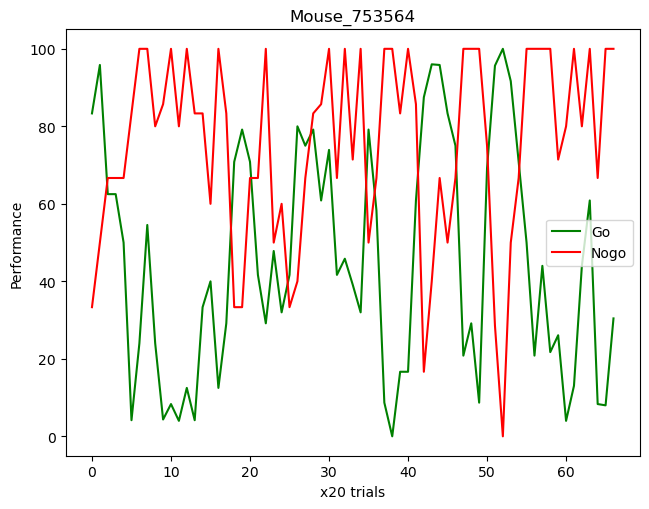

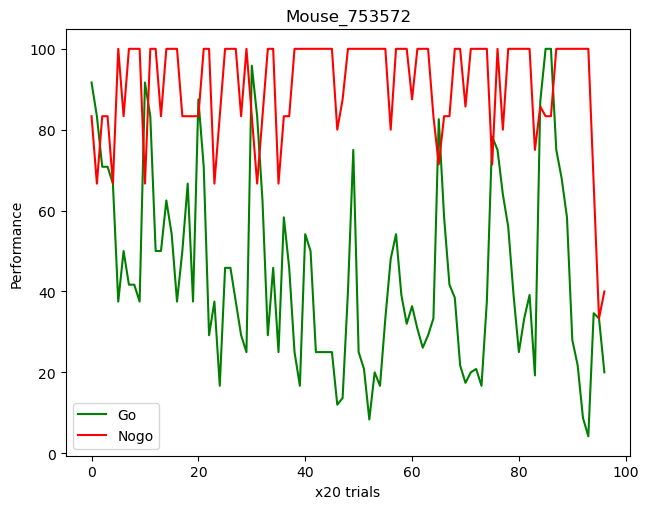

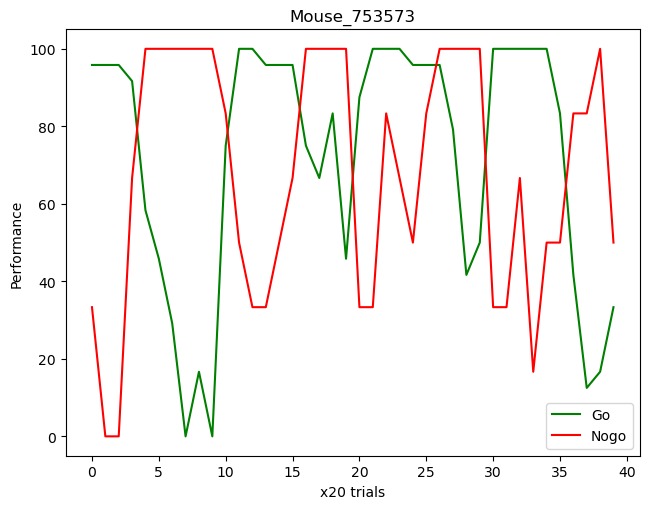

In [5]:
for mouse in mice:
    ta_type = [f.ta_type for f in mouse.elphy]
    ttype = [f.tr_type for f in mouse.elphy]
    tcorr = [f.tr_corr for f in mouse.elphy]
    ttype = [t[:len(c)] for t, c in zip(ttype, tcorr)]
    ttype = np.concatenate(ttype)
    tcorr = np.concatenate(tcorr)

    task = ttype*tcorr

    sf = 30
    blocks = [ttype[i*sf:(i+1)*sf] for i in range(int(len(ttype)/sf))]
    corr_blocks = [tcorr[i*sf:(i+1)*sf] for i in range(int(len(tcorr)/sf))]

    go = []
    nogo = []
    for i, b in enumerate(blocks):
        idx_gos = np.where(b == 2)[0]
        idx_nogos = np.where(b == 1)[0]
        if len(idx_gos) > 0:
            go.append(np.sum(corr_blocks[i][idx_gos])*100/len(idx_gos))
            nogo.append(np.sum(corr_blocks[i][idx_nogos])*100/len(idx_nogos))
    plt.plot(go, c='green', label='Go')
    plt.plot(nogo, c='red', label='Nogo')
    plt.legend()
    plt.tight_layout()
    plt.xlabel('x20 trials')
    plt.ylabel('Performance')
    plt.title('Mouse_{}'.format(mouse.ID))
    plt.savefig('{}.png'.format(mouse.ID), dpi=250)
    plt.show()

        
    
    

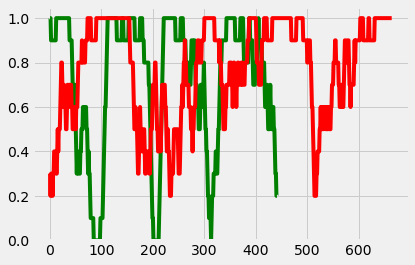

In [5]:
    smoothness = 10
    for mouse in mice[2:]:
        ta_type = np.concatenate([np.array(f.ta_type) for f in mouse.elphy])
        tr_corr = np.concatenate([np.array(f.tr_corr) for f in mouse.elphy])
        
        gos = [c for c, t in zip(tr_corr, ta_type) if t == 1]
        nogos = [c for c, t in zip(tr_corr, ta_type) if t == 2]

        conv_gos = np.convolve(gos, np.ones(smoothness)/smoothness, mode='valid')
        conv_nogos = np.convolve(nogos, np.ones(smoothness)/smoothness, mode='valid')

        plt.plot(conv_gos, c='green')
        plt.plot(conv_nogos, c='red')
        plt.ylim((0, 1.05))
        plt.show()

[75.0, 83.33333333333333, 75.0, 75.0, 75.0, 75.0, 66.66666666666667, 25.0, 8.333333333333334, 33.333333333333336, 16.666666666666668, 50.0, 8.333333333333334, 16.666666666666668, 66.66666666666667, 8.333333333333334, 33.333333333333336, 8.333333333333334, 60.0, 81.81818181818181, 84.61538461538461, 45.45454545454545, 46.15384615384615, 50.0, 16.666666666666668, 38.46153846153846, 10.0, 8.333333333333334, 15.384615384615385, 33.333333333333336, 8.333333333333334, 38.46153846153846, 0.0, 15.384615384615385, 50.0, 18.181818181818183, 20.0, 11.11111111111111, 53.84615384615385, 84.61538461538461, 75.0, 84.61538461538461, 60.0, 46.15384615384615, 36.36363636363637, 50.0, 33.333333333333336, 30.76923076923077, 72.72727272727273, 38.46153846153846, 9.090909090909092, 9.090909090909092, 6.666666666666667, 10.0, 36.36363636363637, 41.666666666666664, 0.0, 18.181818181818183, 16.666666666666668, 23.076923076923077, 33.333333333333336, 25.0, 0.0] [1, 2, 4, 7, 10, 12, 15, 19, 20, 25, 26, 28, 30, 3

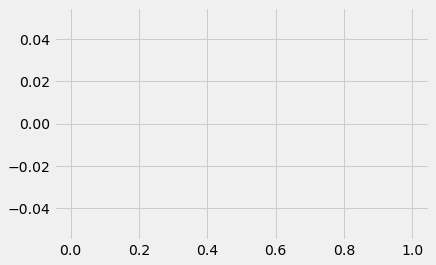

[75.0, 83.33333333333333, 75.0, 75.0, 75.0, 75.0, 66.66666666666667, 25.0, 8.333333333333334, 33.333333333333336, 16.666666666666668, 50.0, 8.333333333333334, 16.666666666666668, 66.66666666666667, 8.333333333333334, 33.333333333333336, 8.333333333333334, 60.0, 81.81818181818181, 84.61538461538461, 45.45454545454545, 46.15384615384615, 50.0, 16.666666666666668, 38.46153846153846, 10.0, 8.333333333333334, 15.384615384615385, 33.333333333333336, 8.333333333333334, 38.46153846153846, 0.0, 15.384615384615385, 50.0, 18.181818181818183, 20.0, 11.11111111111111, 53.84615384615385, 84.61538461538461, 75.0, 84.61538461538461, 60.0, 46.15384615384615, 36.36363636363637, 50.0, 33.333333333333336, 30.76923076923077, 72.72727272727273, 38.46153846153846, 9.090909090909092, 9.090909090909092, 6.666666666666667, 10.0, 36.36363636363637, 41.666666666666664, 0.0, 18.181818181818183, 16.666666666666668, 23.076923076923077, 33.333333333333336, 25.0, 0.0] [4, 7, 8, 9, 12, 13, 15, 19, 20, 21, 27, 29, 31, 3

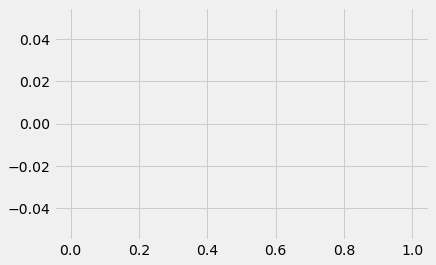

[75.0, 83.33333333333333, 75.0, 75.0, 75.0, 75.0, 66.66666666666667, 25.0, 8.333333333333334, 33.333333333333336, 16.666666666666668, 50.0, 8.333333333333334, 16.666666666666668, 66.66666666666667, 8.333333333333334, 33.333333333333336, 8.333333333333334, 60.0, 81.81818181818181, 84.61538461538461, 45.45454545454545, 46.15384615384615, 50.0, 16.666666666666668, 38.46153846153846, 10.0, 8.333333333333334, 15.384615384615385, 33.333333333333336, 8.333333333333334, 38.46153846153846, 0.0, 15.384615384615385, 50.0, 18.181818181818183, 20.0, 11.11111111111111, 53.84615384615385, 84.61538461538461, 75.0, 84.61538461538461, 60.0, 46.15384615384615, 36.36363636363637, 50.0, 33.333333333333336, 30.76923076923077, 72.72727272727273, 38.46153846153846, 9.090909090909092, 9.090909090909092, 6.666666666666667, 10.0, 36.36363636363637, 41.666666666666664, 0.0, 18.181818181818183, 16.666666666666668, 23.076923076923077, 33.333333333333336, 25.0, 0.0] [5, 6, 8, 9, 12, 16, 17, 18, 20, 21, 22, 23, 30, 3

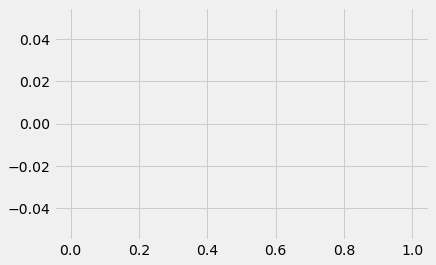

In [40]:
for mouse in mice:
    all_golicks, all_nogolicks = [], []
    for f in mouse.elphy:
        gos = [l for i, (c, t) in enumerate(zip(f.tr_licks, f.tr_type)) if ((t == 2))]
        nogos = [i for i, (c, t) in enumerate(zip(f.tr_licks, f.tr_type)) if ((t == 3))]
        
        print(go, nogos)
        

    all_golicks, all_nogolicks = np.array(all_golicks), np.array(all_nogolicks)

    plt.hist(all_golicks, bins=100, color='green')
    plt.hist(all_nogolicks, bins=100, color='red')

    plt.show()
    plt.close()